# optimization and efficient frontier

In [1]:
import pandas as pd

In [2]:
#data=pd.read_csv('C:/Users/91957/Downloads/ind49_m_vw_rets.csv',header=0,index_col=0,parse_dates=True)  # ignore parsing error
data=pd.read_csv('ind49_m_vw_rets.csv',header=0,index_col=0,parse_dates=True)

C:\Users\91957\AppData\Local\Temp\ipykernel_10984\3928686650.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data=pd.read_csv('ind49_m_vw_rets.csv',header=0,index_col=0,parse_dates=True)


In [3]:
data.head()

,Agric,Food,Soda,Beer,Smoke,Toys,Fun,Books,Hshld,Clths,...,Boxes,Trans,Whlsl,Rtail,Meals,Banks,Insur,RlEst,Fin,Other
192607,2.37,0.12,-99.99,-5.19,1.29,8.65,2.50,50.21,-0.48,8.08,...,7.70,1.94,-23.79,0.07,1.87,4.61,-0.54,2.89,-4.85,5.20
192608,2.23,2.68,-99.99,27.03,6.50,16.81,-0.76,42.98,-3.58,-2.51,...,-2.38,4.88,5.39,-0.75,-0.13,11.83,2.57,5.30,-0.57,6.76
192609,-0.57,1.58,-99.99,4.02,1.26,8.33,6.42,-4.91,0.73,-0.51,...,-5.54,0.06,-7.87,0.25,-0.56,-1.75,0.72,-3.06,-3.14,-3.86
192610,-0.46,-3.68,-99.99,-3.31,1.06,-1.40,-5.09,5.37,-4.68,0.12,...,-5.08,-2.64,-15.38,-2.20,-4.11,-11.82,-4.28,-5.74,2.07,-8.49
192611,6.75,6.26,-99.99,7.29,4.55,0.00,1.82,-6.40,-0.54,1.87,...,3.84,1.60,4.67,6.52,4.33,-2.97,3.58,2.21,4.92,4.00


In [4]:
data.index

Index([192607, 192608, 192609, 192610, 192611, 192612, 192701, 192702, 192703,
       192704,
       ...
       201803, 201804, 201805, 201806, 201807, 201808, 201809, 201810, 201811,
       201812],
      dtype='int64', length=1110)

In [5]:
# stored as integer so problem
data.index=pd.to_datetime(data.index,format="%Y%m").to_period('M')

In [6]:
data.index

PeriodIndex(['1926-07', '1926-08', '1926-09', '1926-10', '1926-11', '1926-12',
             '1927-01', '1927-02', '1927-03', '1927-04',
             ...
             '2018-03', '2018-04', '2018-05', '2018-06', '2018-07', '2018-08',
             '2018-09', '2018-10', '2018-11', '2018-12'],
            dtype='period[M]', length=1110)

In [7]:
data=data/100   # before in pct now in numerical
data.head();

In [8]:
data.columns

Index(['Agric', 'Food ', 'Soda ', 'Beer ', 'Smoke', 'Toys ', 'Fun  ', 'Books',
       'Hshld', 'Clths', 'Hlth ', 'MedEq', 'Drugs', 'Chems', 'Rubbr', 'Txtls',
       'BldMt', 'Cnstr', 'Steel', 'FabPr', 'Mach ', 'ElcEq', 'Autos', 'Aero ',
       'Ships', 'Guns ', 'Gold ', 'Mines', 'Coal ', 'Oil  ', 'Util ', 'Telcm',
       'PerSv', 'BusSv', 'Hardw', 'Softw', 'Chips', 'LabEq', 'Paper', 'Boxes',
       'Trans', 'Whlsl', 'Rtail', 'Meals', 'Banks', 'Insur', 'RlEst', 'Fin  ',
       'Other'],
      dtype='object')

In [9]:
data.columns=data.columns.str.strip()
data.columns

Index(['Agric', 'Food', 'Soda', 'Beer', 'Smoke', 'Toys', 'Fun', 'Books',
       'Hshld', 'Clths', 'Hlth', 'MedEq', 'Drugs', 'Chems', 'Rubbr', 'Txtls',
       'BldMt', 'Cnstr', 'Steel', 'FabPr', 'Mach', 'ElcEq', 'Autos', 'Aero',
       'Ships', 'Guns', 'Gold', 'Mines', 'Coal', 'Oil', 'Util', 'Telcm',
       'PerSv', 'BusSv', 'Hardw', 'Softw', 'Chips', 'LabEq', 'Paper', 'Boxes',
       'Trans', 'Whlsl', 'Rtail', 'Meals', 'Banks', 'Insur', 'RlEst', 'Fin',
       'Other'],
      dtype='object')

In [10]:
data['1995':'2015']

,Agric,Food,Soda,Beer,Smoke,Toys,Fun,Books,Hshld,Clths,...,Boxes,Trans,Whlsl,Rtail,Meals,Banks,Insur,RlEst,Fin,Other
1995-01,0.0787,0.0210,0.0611,0.0284,0.0459,0.0014,0.0793,0.0014,0.0273,-0.0413,...,0.0299,0.0336,0.0050,0.0083,0.0715,0.0605,0.0576,-0.0077,0.0407,0.0403
1995-02,-0.0512,0.0149,0.0514,0.0487,-0.0124,0.0426,0.0390,0.0524,0.0333,0.0207,...,0.0566,0.0747,0.0540,0.0213,0.0316,0.0664,0.0225,0.0835,0.0633,-0.0408
1995-03,0.0616,0.0353,0.0181,0.0240,0.0591,0.0200,0.0456,0.0137,0.0197,0.0247,...,0.0670,0.0333,0.0188,0.0393,0.0197,0.0049,0.0234,0.0083,0.0072,0.0295
1995-04,0.0426,0.0383,0.0248,0.0323,-0.0435,-0.0497,0.0335,-0.0249,0.0399,-0.0124,...,-0.0410,0.0274,0.0328,-0.0348,0.0251,0.0408,-0.0230,-0.0066,0.0393,0.0000
1995-05,0.0200,0.0337,-0.0273,0.0842,0.0392,0.0616,0.0144,0.0378,0.0258,0.0061,...,0.0073,-0.0052,0.0215,0.0280,0.0405,0.0811,0.0445,0.0710,0.0397,0.0528
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2015-08,-0.0459,-0.0422,-0.0457,-0.0312,-0.0406,-0.0483,-0.0779,-0.0876,-0.0694,-0.0386,...,-0.0358,-0.0637,-0.0427,-0.0542,-0.0648,-0.0635,-0.0558,-0.1108,-0.0848,-0.0549
2015-09,-0.1116,-0.0173,0.0215,0.0258,0.0237,-0.0542,-0.1075,-0.0565,-0.0053,0.0118,...,-0.0497,-0.0071,-0.0600,-0.0172,0.0044,-0.0324,-0.0199,-0.0306,-0.0482,-0.0204
2015-10,0.0863,0.0544,0.0577,0.0806,0.1090,0.1186,0.1514,0.1244,0.0581,0.0098,...,0.0978,0.0648,0.0517,0.0453,0.0505,0.0560,0.0523,0.1061,0.0783,0.0710
2015-11,0.0187,-0.0159,0.0236,-0.0071,-0.0300,-0.0223,-0.0008,-0.0006,-0.0110,-0.0108,...,-0.0032,-0.0110,0.0270,0.0059,-0.0101,0.0305,-0.0025,-0.0116,0.0326,0.0000


## covariance matrix

In [11]:
cov=data['1995':'2000'].cov()
cov

,Agric,Food,Soda,Beer,Smoke,Toys,Fun,Books,Hshld,Clths,...,Boxes,Trans,Whlsl,Rtail,Meals,Banks,Insur,RlEst,Fin,Other
Agric,0.004342,0.000563,0.000228,0.000189,0.000056,0.001020,0.000419,0.001011,0.000429,0.001161,...,0.001401,0.000700,0.000598,0.001081,0.000603,0.000968,0.000791,0.001152,0.001874,0.000666
Food,0.000563,0.002504,0.001705,0.002044,0.001891,0.001150,0.000639,0.000831,0.001137,0.001453,...,0.001493,0.001267,0.000601,0.001170,0.001081,0.001981,0.002017,0.000688,0.001092,0.000982
Soda,0.000228,0.001705,0.008989,0.003672,0.001277,0.001532,0.001077,0.001459,0.002666,0.002153,...,0.002345,0.002550,0.001447,0.001309,0.001542,0.002926,0.002413,0.001887,0.002437,0.001977
Beer,0.000189,0.002044,0.003672,0.004599,0.001143,0.001564,0.001113,0.000755,0.002447,0.001415,...,0.001603,0.001975,0.000609,0.001442,0.001634,0.002398,0.002379,0.000996,0.001767,0.001533
Smoke,0.000056,0.001891,0.001277,0.001143,0.007130,0.001417,0.000201,-0.000183,0.000981,0.000761,...,0.001631,0.000244,0.001363,0.000069,0.000590,0.001207,0.001255,0.000467,0.000550,0.001101
Toys,0.001020,0.001150,0.001532,0.001564,0.001417,0.004069,0.001790,0.000967,0.001345,0.001937,...,0.002457,0.001679,0.001086,0.001678,0.001667,0.001648,0.001540,0.001414,0.002402,0.001652
Fun,0.000419,0.000639,0.001077,0.001113,0.000201,0.001790,0.003701,0.001518,0.000991,0.001797,...,0.002350,0.001416,0.001768,0.001648,0.001370,0.002122,0.001582,0.001414,0.003217,0.002334
Books,0.001011,0.000831,0.001459,0.000755,-0.000183,0.000967,0.001518,0.002359,0.000873,0.002029,...,0.002241,0.001576,0.001153,0.002009,0.001008,0.001914,0.001737,0.001407,0.002702,0.001624
Hshld,0.000429,0.001137,0.002666,0.002447,0.000981,0.001345,0.000991,0.000873,0.002849,0.001046,...,0.001856,0.001365,0.000578,0.001157,0.001076,0.001793,0.001450,0.000620,0.001687,0.001443
Clths,0.001161,0.001453,0.002153,0.001415,0.000761,0.001937,0.001797,0.002029,0.001046,0.004896,...,0.003159,0.002464,0.001654,0.002607,0.002229,0.002802,0.002590,0.002096,0.002801,0.002311


In [12]:
# now lets calculate annualized returns
t=(1+data['1995':'2000']).cumprod(axis=0).iloc[-1]
t=t**(1/(t.shape[0]/12))-1
t.shape  # row vector 

(49,)

In [13]:
import numpy as np
p=np.ones([49,1]);


In [14]:
np.matmul(t,p)

array([11.37350677])

In [15]:
t@p


array([11.37350677])

## creating covariance matrix of selected assets

In [16]:
l=['Toys','Beer','Fin']
cov_1=cov.loc[l,l]
cov_1

,Toys,Beer,Fin
Toys,0.004069,0.001564,0.002402
Beer,0.001564,0.004599,0.001767
Fin,0.002402,0.001767,0.006403


In [17]:
returns=t.loc[l]
returns

Toys   -0.054307
Beer    0.291456
Fin     0.528632
Name: 2000-12, dtype: float64

In [18]:
weights=np.repeat(1/3,3)
weights

array([0.33333333, 0.33333333, 0.33333333])

In [19]:
# weighted return
weights@returns

0.2552603025539956

In [20]:
weights.T@returns

0.2552603025539956

In [21]:
weights=np.array([0.5,0.5,0])

In [22]:
v =(weights@cov_1@weights.T)**0.5
v

0.05430360269493593

In [23]:
v =(weights.T@cov_1@weights)**0.5   # any method wil work @python zindabad
v

0.05430360269493593

# 2 asset frontier

In [24]:
# to construct  frontier creating different weights and then many portfolios such that return maximixed for a risk; joining all points frontier created
n=20
weights=[np.array([w,1-w]) for w in np.linspace (0,1,20)]
weights

[array([0., 1.]),
 array([0.05263158, 0.94736842]),
 array([0.10526316, 0.89473684]),
 array([0.15789474, 0.84210526]),
 array([0.21052632, 0.78947368]),
 array([0.26315789, 0.73684211]),
 array([0.31578947, 0.68421053]),
 array([0.36842105, 0.63157895]),
 array([0.42105263, 0.57894737]),
 array([0.47368421, 0.52631579]),
 array([0.52631579, 0.47368421]),
 array([0.57894737, 0.42105263]),
 array([0.63157895, 0.36842105]),
 array([0.68421053, 0.31578947]),
 array([0.73684211, 0.26315789]),
 array([0.78947368, 0.21052632]),
 array([0.84210526, 0.15789474]),
 array([0.89473684, 0.10526316]),
 array([0.94736842, 0.05263158]),
 array([1., 0.])]

In [25]:
l=['Food','Beer']
returns=t[l]
returns

Food    0.234411
Beer    0.291456
Name: 2000-12, dtype: float64

In [26]:
cov_1=cov.loc[l,l]
cov_1

,Food,Beer
Food,0.002504,0.002044
Beer,0.002044,0.004599


In [27]:
#rets= w@returns for w in weights 
rets= [w.T@returns for w in weights ]
len(rets)

20

In [28]:
vol= [(w.T@cov_1@w)**0.5 for w in weights ]
vol

[0.06781325290214724,
 0.06586445807267136,
 0.06398680206294696,
 0.06218672906881978,
 0.0604711678348848,
 0.058847510052259536,
 0.0573235655938004,
 0.05590748910855018,
 0.054607672880819115,
 0.05343260212168603,
 0.0523906712548163,
 0.05148996341585449,
 0.05073800019316688,
 0.05014147412708904,
 0.049705981779593164,
 0.049435779094790494,
 0.049333582048586046,
 0.04940043333595555,
 0.049635649918337674,
 0.050036857463786936]

<Axes: >

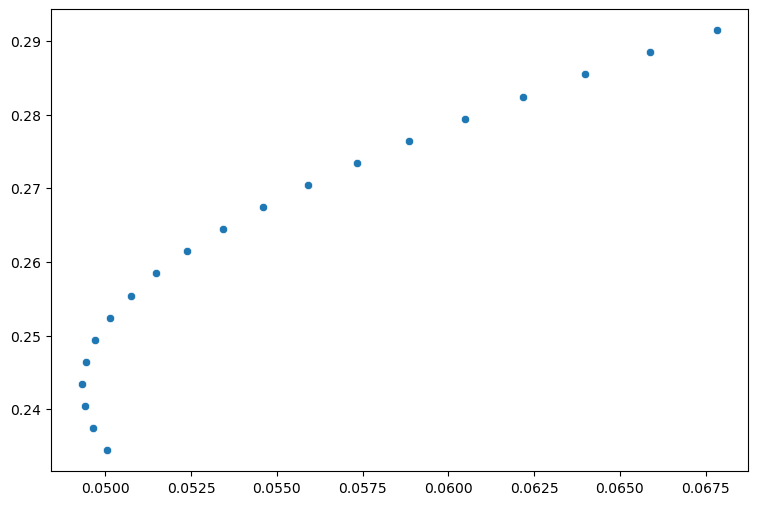

In [29]:
%matplotlib inline 
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(9,6))
sns.scatterplot(x=vol,y=rets)



In [30]:
from scipy.optimize import minimize

In [31]:
def vol(weights,cov):
    return (weights@cov@weights.T)**0.5
    

In [32]:
from scipy.optimize import minimize
def minimize_vol(target_ret,rets,cov,n):
    initial=np.repeat(1/n,n) # initial guess of weights
    bounds=((0.0,1.0),)*n 
    # return value will be a n element vector of weight of single asset, each weight is range(0,1) so we create a tuple of tuples to enforce that
    # now setting up the constraints first target return should be achieved
    target_achieved={
        'type':'eq',# checks for equality
        'args':(rets,), # constraint on weight but rets also required
        #function       
        'fun':lambda weights,rets:target_ret-weights.T@rets
                      # x,y        #f(x,y)
        # we want to check if f(x,y)=0
    }
    sum_1={
        'type':'eq', # no additional args required
        'fun':lambda weights:np.sum(weights)-1
    }
    
    result=minimize( vol,initial,#from scipy optimize 
                    args=(cov,),method="SLSQP",
                   options={'disp':False},
                   constraints=(sum_1,target_achieved),
                   bounds=bounds) 
    return result.x # rewsult gives us many things we only want last answer
        # I have to write vol as function name I want to minimize if I directly write weights.T@cov@weights error coming
        
    
   

In [33]:
# verifying for the 2 asset case
w1=minimize_vol(0.245,returns,cov_1,2)
w1


array([0.81437229, 0.18562771])

In [34]:
v=(w1@cov_1@w1)**0.5
v

0.04936638864291786

In [35]:
(np.dot(np.matmul(w1,cov_1),w1))**0.5


0.04936638864291786

In [37]:
# here only two assets so every portfolio lie on same curve for multiple assets we will have to choose portfolio offering max return for a specified risk
# lets now create a def
def create_frontier(returns,cov,n):
    '''plot n asset efficient frontier
    '''
    weights=[minimize_vol(x,returns,cov,n) for x in np.linspace(returns.min(),returns.max(),50)]    # weights have to be set to minimize variance for a return 
    rets= [w@returns for w in weights ]
    vol= [(w@cov@w)**0.5 for w in weights ]
    plt.figure(figsize=(12,6))
    sns.scatterplot(x=vol,y=rets)
    plt.show()
    
    
    

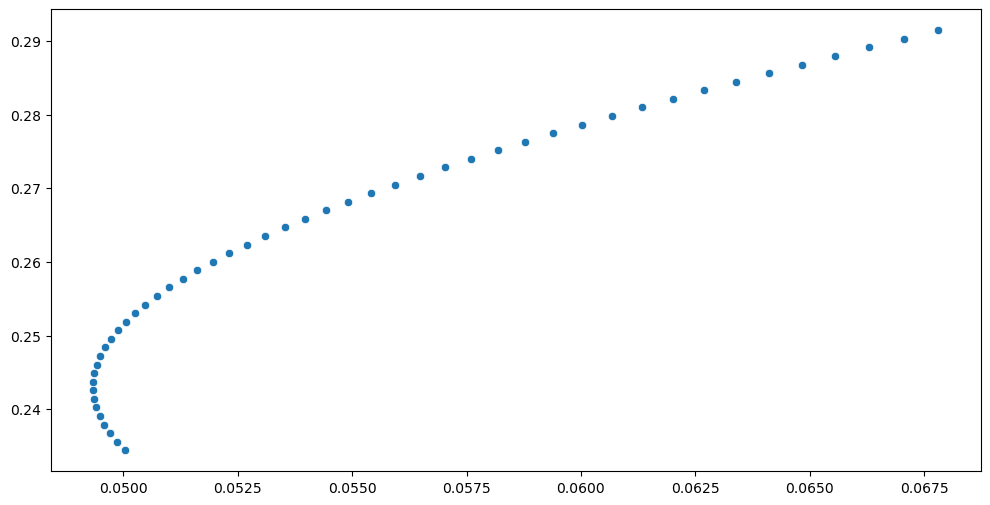

In [38]:
create_frontier(returns,cov_1,2)

In [39]:
m=['Beer','Toys','Coal','Books']
rets=t[m]
rets

Beer     0.291456
Toys    -0.054307
Coal     0.542537
Books    0.338853
Name: 2000-12, dtype: float64

In [40]:
cov_=cov.loc[m,m]
cov_

,Beer,Toys,Coal,Books
Beer,0.004599,0.001564,0.001261,0.000755
Toys,0.001564,0.004069,-0.000375,0.000967
Coal,0.001261,-0.000375,0.016153,0.002067
Books,0.000755,0.000967,0.002067,0.002359


In [41]:
cov_

,Beer,Toys,Coal,Books
Beer,0.004599,0.001564,0.001261,0.000755
Toys,0.001564,0.004069,-0.000375,0.000967
Coal,0.001261,-0.000375,0.016153,0.002067
Books,0.000755,0.000967,0.002067,0.002359


In [42]:
p=minimize_vol(0.3,rets,cov_,4)
p

array([0.2428116 , 0.08570005, 0.03117366, 0.64031469])

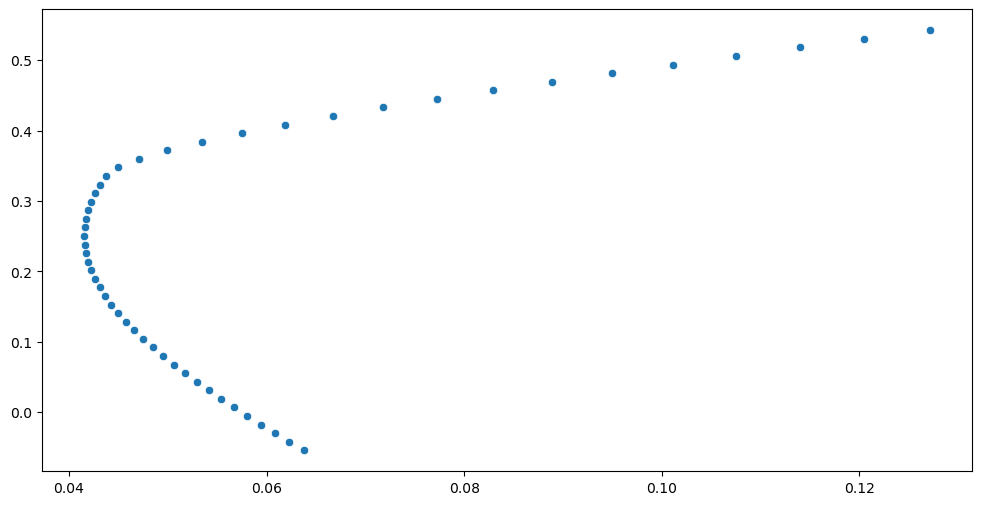

In [43]:
fig=create_frontier(rets,cov_,4)

In [44]:
np.dot(p,rets)

0.30000000014740197

In [45]:
p.T@cov_@p

0.0017894604475616744

# introducing risk free asset
due to it we can now plot maximum sharpe ratio portfolio and combination of it with risk free asset
remain only reasonable choices.

In [46]:
# creating a function to maximize sharpe ratio

    

In [47]:
 def neg_sr(weight,ret,cov,riskfree_rate):
        return  (riskfree_rate-np.dot(weight,ret))/(weight.T@cov@weight)**0.5

In [48]:

def msr(riskfree_rate,ret,cov,n):
    initial=np.repeat(1/n,n) 
    bounds=((0.0,1.0),)*n 
    sum_1={
        'type':'eq', 
        'fun':lambda weights:np.sum(weights)-1
    }
   
    
    result=minimize(neg_sr,initial,#minimize -ve of sharpe ratio so maximizing it
                    args=(ret,cov,riskfree_rate,),method="SLSQP", # args in order of neg_sr
                   options={'disp':False},
                   constraints=(sum_1),
                   bounds=bounds) 
    return result.x 
        
    
   

In [49]:
w=msr(0.2,rets,cov_,4)
w.T@rets



0.3786096336929318

In [67]:
def cml(returns,cov,n,riskfree_rate):
    weights=[minimize_vol(x,returns,cov,n) for x in np.linspace(returns.min(),returns.max(),50)]    
    rets= [w@returns for w in weights ]
    vol= [(w@cov@w)**0.5 for w in weights ]
    plt.figure(figsize=(12,6))
    sns.scatterplot(x=vol,y=rets)
   # plt.show() if this line in code 2 separate graphs
    w=msr(riskfree_rate,returns,cov,n)
    p1=[0,(w.T@cov@w)**0.5]
    p2=[riskfree_rate,w.T@returns]
    #plotting cml
    plt.plot(p1,p2,color='red',marker='o',linestyle='--')
    plt.show()
    

In [61]:
w=msr(0.2,rets,cov_,4)
w

array([0.13059876, 0.        , 0.22557939, 0.64382184])

In [62]:
(w.T@cov_@w)**0.5

0.051765026584308184

In [63]:
w.T@rets

0.3786096336929318

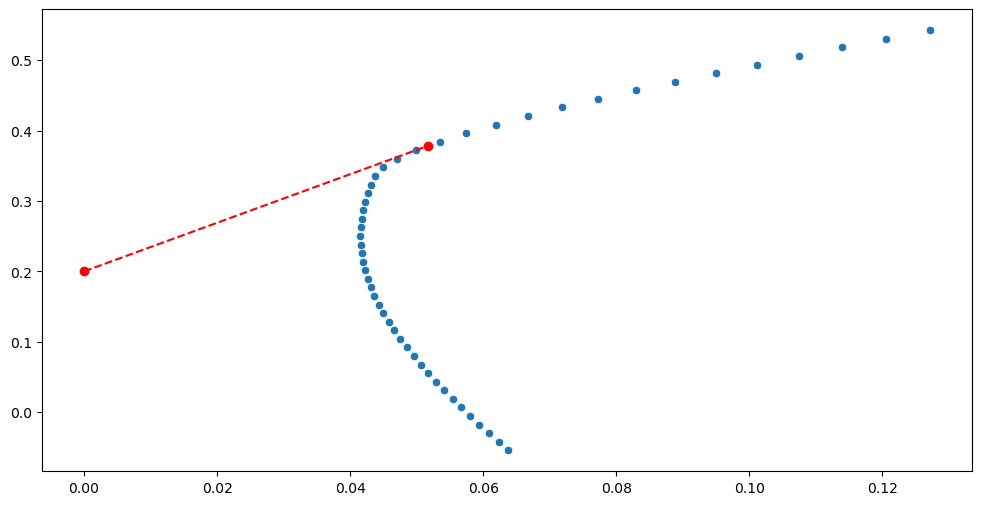

In [68]:
cml(rets,cov_,4,0.2)

## GMV


the MSR is quite prone to model or estimation errors that is if we are not able to get good estimates of covariance and returns matrix ,predicted values may be wrong by a very large margin. 
However covariance matrix accuracy can be improved and hence we can more accurately predict the portfolio which has the minimum variance of them all. It is called global minimum variance portfolio.

In [69]:
def gmvw(cov,n):
    
    initial=np.repeat(1/n,n)
    bounds=((0.0,1.0),)*n 
    sum_1={
        'type':'eq', 
        'fun':lambda weights:np.sum(weights)-1
    }
   
    
    result=minimize(vol,initial,#minimize -ve of sharpe ratio so maximizing it
                    args=(cov,),method="SLSQP", # args in order of neg_sr
                   options={'disp':False},
                   constraints=(sum_1),
                   bounds=bounds) 
    return result.x 
    
    

In [86]:
k=gmvw(cov_,4)
k

array([0.20455258, 0.21561789, 0.02383329, 0.55599623])

4

In [89]:
def gmw_plot(returns,cov):
    n=returns.size 
    weights=[minimize_vol(x,returns,cov,n) for x in np.linspace(returns.min(),returns.max(),50)]    # weights have to be set to minimize variance for a return 
    ret= [w@returns for w in weights ]
    vol= [(w@cov@w)**0.5 for w in weights ]
    plt.figsize=(12,6)
    sns.scatterplot(x=vol,y=ret)
    w=gmvw(cov,n)
    y=[w@returns]
    x=[(w@cov@w)**0.5]
    plt.plot(x,y,color='yellow',marker='o',markersize=10)
    plt.show()

in all of the above functions instead of stating n explicitly I could also define n in function
as n=returns.size  or cov.shape[0]

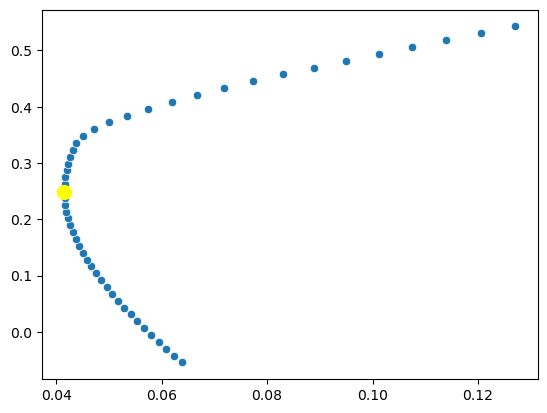

In [90]:
gmw_plot(rets,cov_)